In [22]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage, misc
from scipy.linalg import toeplitz
#np.set_printoptions(threshold=np.inf)

In [6]:
# dimensions
n     = 80
m     = 80
depth = 40.0

In [7]:
#borehole depth (km)
dm = depth/float(m)
dn = depth/float(n)
depths = np.linspace(0.0,depth,m) 
g  = np.zeros((n,m))

In [8]:
for i in range(n):
    for j in range(m):
        if(i*dn>j*dm):
            g[i,j]=dm
        elif(i*dn>=(j-1)*dm):
            g[i,j]=i*dn-(j-1)*dm

In [9]:
mtrue=np.zeros((m))
for j in range(m):
    if(j>=3*m/8 and j<5*m/8):
        mtrue[j]=2.0
    else:
        mtrue[j]=2.0+3.0*float(j)/float(m)


In [10]:
d=np.zeros((n))
np.random.seed(0)
d=np.dot(g,mtrue)+np.random.normal(0.0,0.1,n)


In [11]:
dprime=[(d[i+1]-d[i])/(dn) for i in range(1,n-2)] #range(start, stop)

In [12]:
temp  = np.dot(g.T,g)
mest1 = np.dot(np.linalg.inv(temp),np.dot(g.T,d))

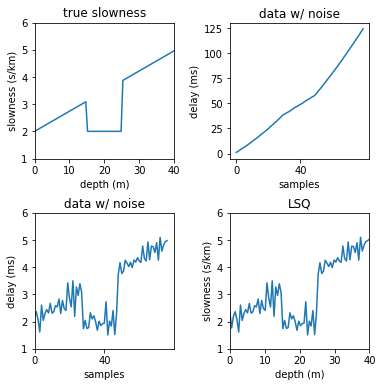

In [13]:
plt.figure(figsize=(6,6))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

ax=plt.subplot(221)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.plot(depths,mtrue)
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('true slowness')
plt.axis([0,m*dm,1,6])

ax=plt.subplot(222)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.plot(d)
ax.set_xlabel("samples")
ax.set_ylabel("delay (ms)")
plt.title('data w/ noise')
plt.xticks(np.arange(0,n,40))

ax=plt.subplot(223)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.plot(dprime)
ax.set_xlabel("samples")
ax.set_ylabel("delay (ms)")
plt.title('data w/ noise')
plt.axis([0,n,1,6])
plt.xticks(np.arange(0,n,40))

ax=plt.subplot(224)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.plot(depths,mest1)
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('LSQ')
plt.axis([0,m*dm,1,6])

plt.show()